In [1]:
import pandas as pd
from pyproj import Transformer

# --------------------------
# Load your original flood CSV
# --------------------------
flood_path = "flood_data.csv"
flood_df = pd.read_csv(flood_path)

# --------------------------
# Make sure date column is datetime
# --------------------------
flood_df['date'] = pd.to_datetime(flood_df['date'], errors='coerce')

# --------------------------
# UTM → Lat/Lon conversion
# Assuming all UTM are zone 49S (Semarang)
# --------------------------
transformer = Transformer.from_crs(
    "+proj=utm +zone=49 +south +datum=WGS84 +units=m +no_defs",
    "EPSG:4326",
    always_xy=True
)

# Apply conversion
flood_df[['lat','lon']] = flood_df.apply(
    lambda row: pd.Series(transformer.transform(row['X'], row['Y'])),
    axis=1
)

# --------------------------
# Save new CSV with lat/lon
# --------------------------
new_path = "flood_data_with_latlon.csv"
flood_df.to_csv(new_path, index=False, encoding='utf-8-sig')

print(f"✅ New CSV saved as {new_path}")


✅ New CSV saved as flood_data_with_latlon.csv


/var/folders/j8/y_9b3dcx03nct600zgv3jf_80000gn/T/ipykernel_12214/3823327406.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flood_df['date'] = pd.to_datetime(flood_df['date'], errors='coerce')


In [4]:
flood_df.dtypes

X                          float64
Y                          float64
Natural_disaster            object
Name_of_area                object
date                datetime64[ns]
lat                        float64
lon                        float64
dtype: object

In [1]:
import pandas as pd
flood_path = "rainfall_data_filtered.csv"
flood_df = pd.read_csv(flood_path)

In [6]:
flood_df['date'].dtype

dtype('O')

In [7]:
flood_df['date'] = pd.to_datetime(flood_df['date'], format="%m/%d/%y", errors='coerce')

In [8]:
flood_df['date'].dtype

dtype('<M8[ns]')

In [11]:
import plotly.express as px
fig = px.line(
    flood_df,
    x='date',
    y='rainfall(mm)',
    color='location_name',
    title="Daily Rainfall (mm)",
    markers=True
)

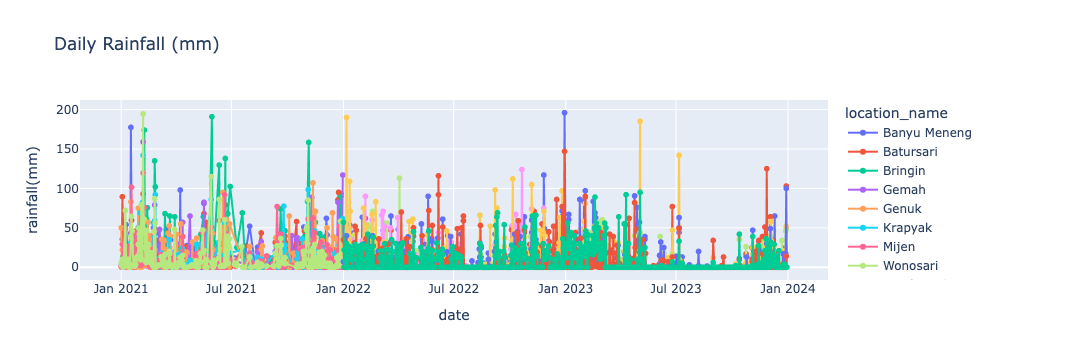

In [12]:
fig